In [1]:
pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import os
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib_venn')

# Read the Intro data
df_Intro = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/Absolute_keyword_count_Intro.xlsx')

# Read the Zoning data
df_Zoning = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/Absolute_keyword_count_Zoning.xlsx')

# Read the Action data
df_Actions = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/Absolute_keyword_count_Actions.xlsx')

# Rename the column "bombing" to "blast fishing" in all three dataframes
df_Intro.rename(columns={'bombing': 'blast fishing'}, inplace=True)
df_Zoning.rename(columns={'bombing': 'blast fishing'}, inplace=True)
df_Actions.rename(columns={'bombing': 'blast fishing'}, inplace=True)

# Define subcategories for all stressors grouped by category
subcategories_fishing = [
    'muroami', 'bycatch', 'illegal fishing', 'overfishing', 'trawl', 'purse seine',
    'anchoring', 'hookah compressor', 'destructive fishing', 'cyanide', 'blast fishing'
]

subcategories_landbased = [
    'coastal development', 'runoff', 'reclamation', 'eutrophication',
    'pesticide - fertilizer', 'habitat loss', 'plastic', 'erosion',
    'sewage discharge', 'aquaculture pond', 'abrasion', 'sedimentation',
    'deforestation', 'sand mining', 'mineral mining'
]

subcategories_climate = [
    'heatwave', 'extreme weather', 'increasing SST', 'global warming',
    'storms', 'bleaching', 'climate change'
]

subcategories_other = [
    'ballast water', 'volcano eruptions', 'mariculture',
    'crown of thorn', 'mining (oil and gas)', 'disease', 'coral mining'
]

# List of all subcategories (stressors)
all_subcategories = subcategories_other + subcategories_climate + subcategories_landbased + subcategories_fishing

# Function to categorize plans mentioning each stressor in Intro, Zoning, and Actions
def categorize_plans(df_intro, df_Zoning, df_actions, subcategories):
    # Create dictionaries to store the counts
    intro_only = {stressor: 0 for stressor in subcategories}
    zoning_only = {stressor: 0 for stressor in subcategories}
    actions_only = {stressor: 0 for stressor in subcategories}
    intro_and_zoning_only = {stressor: 0 for stressor in subcategories}
    intro_and_actions_only = {stressor: 0 for stressor in subcategories}
    zoning_and_actions_only = {stressor: 0 for stressor in subcategories}
    all_three = {stressor: 0 for stressor in subcategories}
    no_mention = {stressor: 0 for stressor in subcategories}  # New: For plans with no mention
    total = {stressor: 0 for stressor in subcategories}  # New: For total mentions

    for stressor in subcategories:
        plans_intro = set(df_intro[df_intro[stressor] > 0].index)
        plans_zoning = set(df_Zoning[df_Zoning[stressor] > 0].index)
        plans_actions = set(df_actions[df_actions[stressor] > 0].index)

        # Calculate combinations
        all_three_plans = plans_intro & plans_zoning & plans_actions
        intro_and_zoning_only_plans = (plans_intro & plans_zoning) - plans_actions
        intro_and_actions_only_plans = (plans_intro & plans_actions) - plans_zoning
        zoning_and_actions_only_plans = (plans_zoning & plans_actions) - plans_intro
        intro_only_plans = plans_intro - plans_zoning - plans_actions
        zoning_only_plans = plans_zoning - plans_intro - plans_actions
        actions_only_plans = plans_actions - plans_intro - plans_zoning

        # Update counts
        intro_only[stressor] = len(intro_only_plans)
        zoning_only[stressor] = len(zoning_only_plans)
        actions_only[stressor] = len(actions_only_plans)
        intro_and_zoning_only[stressor] = len(intro_and_zoning_only_plans)
        intro_and_actions_only[stressor] = len(intro_and_actions_only_plans)
        zoning_and_actions_only[stressor] = len(zoning_and_actions_only_plans)
        all_three[stressor] = len(all_three_plans)

        # Calculate the "No Mention" plans (those not in any of the three categories)
        all_plans = set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index)
        mentioned_plans = plans_intro | plans_zoning | plans_actions
        no_mention[stressor] = len(all_plans - mentioned_plans)  # New: Count plans that mention nothing

        # Calculate the total plans mentioning the stressor
        total[stressor] = len(mentioned_plans)  # New: Count of all plans that mention the stressor

    # Calculate the total number of plans across all datasets
    total_all = len(set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index))

    return intro_only, zoning_only, actions_only, intro_and_zoning_only, intro_and_actions_only, zoning_and_actions_only, all_three, no_mention, total, total_all

# Get the categorized counts for each stressor
intro_only_counts, zoning_only_counts, actions_only_counts, intro_and_zoning_only_counts, intro_and_actions_only_counts, zoning_and_actions_only_counts, all_three_counts, no_mention_counts, total_counts, total_all = categorize_plans(df_Intro, df_Zoning, df_Actions, all_subcategories)

# Create the DataFrame to hold the results, including Total Mention and Total All
results = {
    'Stressor': all_subcategories,
    'Intro Only': [intro_only_counts[stressor] for stressor in all_subcategories],
    'Zoning Only': [zoning_only_counts[stressor] for stressor in all_subcategories],
    'Actions Only': [actions_only_counts[stressor] for stressor in all_subcategories],
    'Intro and Zoning Only': [intro_and_zoning_only_counts[stressor] for stressor in all_subcategories],
    'Intro and Actions Only': [intro_and_actions_only_counts[stressor] for stressor in all_subcategories],
    'Zoning and Actions Only': [zoning_and_actions_only_counts[stressor] for stressor in all_subcategories],
    'All Three': [all_three_counts[stressor] for stressor in all_subcategories],
    'No Mention': [no_mention_counts[stressor] for stressor in all_subcategories],  # New: No Mention column
    'Total Mention': [intro_only_counts[stressor] + zoning_only_counts[stressor] + actions_only_counts[stressor] + 
                      intro_and_zoning_only_counts[stressor] + intro_and_actions_only_counts[stressor] + 
                      zoning_and_actions_only_counts[stressor] + all_three_counts[stressor] 
                      for stressor in all_subcategories],  # New: Total Mention column
    'Total All': [total_all for _ in all_subcategories]  # New: Total All column, same for all stressors
}

# Create the results DataFrame
results_df = pd.DataFrame(results)

In [3]:
results_df

,Stressor,Intro Only,Zoning Only,Actions Only,Intro and Zoning Only,Intro and Actions Only,Zoning and Actions Only,All Three,No Mention,Total Mention,Total All
0,ballast water,1,0,0,0,0,0,0,76,1,77
1,volcano eruptions,1,0,1,0,1,0,0,74,3,77
2,mariculture,2,5,0,0,0,0,0,70,7,77
3,crown of thorn,9,0,0,1,1,0,0,66,11,77
4,mining (oil and gas),3,13,9,4,0,0,0,48,29,77
5,disease,17,4,8,2,4,0,0,42,35,77
6,coral mining,14,17,0,12,0,1,2,31,46,77
7,heatwave,0,0,0,0,0,0,0,77,0,77
8,extreme weather,1,0,1,0,0,0,0,75,2,77
9,increasing SST,4,1,0,0,0,0,0,72,5,77


In [4]:
# Create a set to hold unique MPA plans in all three sections
unique_plans_in_all_three = set()

# Iterate over each stressor to find unique plans in all three sections
for stressor in all_subcategories:
    if all_three_counts[stressor] > 0:
        # Retrieve the plans for this stressor that are in all three sections
        plans_intro = set(df_Intro[df_Intro[stressor] > 0].index)
        plans_zoning = set(df_Zoning[df_Zoning[stressor] > 0].index)
        plans_actions = set(df_Actions[df_Actions[stressor] > 0].index)
        
        # Find the intersection of plans in all three sections
        all_three_plans = plans_intro & plans_zoning & plans_actions
        
        # Add these plans to the unique set
        unique_plans_in_all_three.update(all_three_plans)

# Convert the unique set to a list for easy printing
unique_plans_list = list(unique_plans_in_all_three)

# Get the total count of unique MPA plans
total_unique_plans_in_all_three = len(unique_plans_list)

# Print the results
print(f'Total number of unique MPA plans that included at least one stressor in all three sections: {total_unique_plans_in_all_three}')
print('Unique MPA plans included in all three sections:')
for index in unique_plans_list:
    # Use the index to get the MPA name from one of the DataFrames (assuming they all have the same index)
    mpa_name = df_Intro.index[index]  # or df_Zoning.index[index] or df_Actions.index[index]
    print(mpa_name)


Total number of unique MPA plans that included at least one stressor in all three sections: 20
Unique MPA plans included in all three sections:
0
66
67
68
3
6
4
8
13
14
16
19
24
32
33
38
52
54
59
62


In [5]:
# Save the results DataFrame to an Excel file - just for reference
output_file = 'df_mentioned_results.xlsx'
results_df.to_excel(output_file, index=False)

print(f"Results have been saved to {output_file}")

Results have been saved to df_mentioned_results.xlsx


C:\Users\capri002\AppData\Local\Temp\ipykernel_30276\1537039871.py:164: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


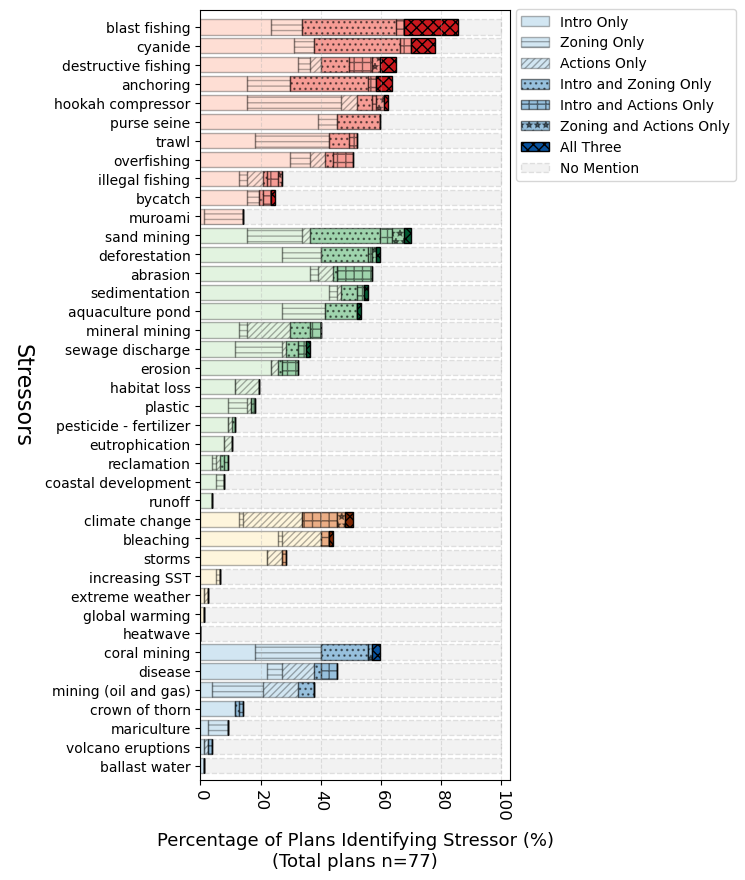

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the percentages instead of raw counts
def categorize_plans(df_intro, df_Zoning, df_actions, subcategories):
    intro_only = {stressor: 0 for stressor in subcategories}
    zoning_only = {stressor: 0 for stressor in subcategories}
    actions_only = {stressor: 0 for stressor in subcategories}
    intro_and_zoning_only = {stressor: 0 for stressor in subcategories}
    intro_and_actions_only = {stressor: 0 for stressor in subcategories}
    zoning_and_actions_only = {stressor: 0 for stressor in subcategories}
    all_three = {stressor: 0 for stressor in subcategories}
    no_mention = {stressor: 0 for stressor in subcategories}
    total = {stressor: 0 for stressor in subcategories}

    for stressor in subcategories:
        plans_intro = set(df_intro[df_intro[stressor] > 0].index)
        plans_zoning = set(df_Zoning[df_Zoning[stressor] > 0].index)
        plans_actions = set(df_actions[df_actions[stressor] > 0].index)

        all_three_plans = plans_intro & plans_zoning & plans_actions
        intro_and_zoning_only_plans = (plans_intro & plans_zoning) - plans_actions
        intro_and_actions_only_plans = (plans_intro & plans_actions) - plans_zoning
        zoning_and_actions_only_plans = (plans_zoning & plans_actions) - plans_intro
        intro_only_plans = plans_intro - plans_zoning - plans_actions
        zoning_only_plans = plans_zoning - plans_intro - plans_actions
        actions_only_plans = plans_actions - plans_intro - plans_zoning

        intro_only[stressor] = len(intro_only_plans)
        zoning_only[stressor] = len(zoning_only_plans)
        actions_only[stressor] = len(actions_only_plans)
        intro_and_zoning_only[stressor] = len(intro_and_zoning_only_plans)
        intro_and_actions_only[stressor] = len(intro_and_actions_only_plans)
        zoning_and_actions_only[stressor] = len(zoning_and_actions_only_plans)
        all_three[stressor] = len(all_three_plans)

        all_plans = set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index)
        mentioned_plans = plans_intro | plans_zoning | plans_actions
        no_mention[stressor] = len(all_plans - mentioned_plans)
        total[stressor] = len(mentioned_plans)

    total_all = len(set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index))

    return (intro_only, zoning_only, actions_only, intro_and_zoning_only,
            intro_and_actions_only, zoning_and_actions_only, all_three,
            no_mention, total, total_all)

# Get categorized counts
intro_only_counts, zoning_only_counts, actions_only_counts, intro_and_zoning_only_counts, intro_and_actions_only_counts, zoning_and_actions_only_counts, all_three_counts, no_mention_counts, total_counts, total_all = categorize_plans(df_Intro, df_Zoning, df_Actions, all_subcategories)

results = {
    'Stressor': all_subcategories,
    'Intro Only': [intro_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Zoning Only': [zoning_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Actions Only': [actions_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Intro and Zoning Only': [intro_and_zoning_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Intro and Actions Only': [intro_and_actions_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Zoning and Actions Only': [zoning_and_actions_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'All Three': [all_three_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'No Mention': [no_mention_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Total Mention': [intro_only_counts[stressor] + zoning_only_counts[stressor] + actions_only_counts[stressor] +
                      intro_and_zoning_only_counts[stressor] + intro_and_actions_only_counts[stressor] +
                      zoning_and_actions_only_counts[stressor] + all_three_counts[stressor]
                      for stressor in all_subcategories],
    'Total All': [total_all for _ in all_subcategories]
}

results_df = pd.DataFrame(results)

results_df['New Total'] = (results_df['Intro Only'] +
                           results_df['Zoning Only'] +
                           results_df['Actions Only'] +
                           results_df['Intro and Zoning Only'] +
                           results_df['Intro and Actions Only'] +
                           results_df['Zoning and Actions Only'] +
                           results_df['All Three'])

results_df['Category'] = np.select(
    [
        results_df['Stressor'].isin(subcategories_fishing),
        results_df['Stressor'].isin(subcategories_landbased),
        results_df['Stressor'].isin(subcategories_climate),
        results_df['Stressor'].isin(subcategories_other)
    ],
    ['Fishing', 'Land-Based', 'Climate', 'Other'],
    default='Unknown'
)

category_order = ['Other', 'Climate', 'Land-Based', 'Fishing']
results_df['Category'] = pd.Categorical(results_df['Category'], categories=category_order, ordered=True)
results_df = results_df.sort_values(by=['Category', 'New Total'], ascending=[True, True])

# Prepare for plotting
sorted_stressors = results_df['Stressor'].tolist()
sorted_intro_counts = results_df['Intro Only'].tolist()
sorted_zoning_counts = results_df['Zoning Only'].tolist()
sorted_action_counts = results_df['Actions Only'].tolist()
sorted_intro_and_zoning_counts = results_df['Intro and Zoning Only'].tolist()
sorted_intro_and_actions_counts = results_df['Intro and Actions Only'].tolist()
sorted_zoning_and_actions_counts = results_df['Zoning and Actions Only'].tolist()
sorted_all_three_counts = results_df['All Three'].tolist()
sorted_no_mention_counts = results_df['No Mention'].tolist()

y = np.arange(len(sorted_stressors)) + 0.25
width = 0.5

fig, ax = plt.subplots(figsize=(4, 10))

color_map = {
    'fishing': {'100': '#fc9272', '010': '#fc9272', '001': '#fc9272', '110': '#ef3b2c', '101': '#ef3b2c', '011': '#ef3b2c', '111': '#cb181d'},
    'landbased': {'100': '#a1d99b', '010': '#a1d99b', '001': '#a1d99b', '110': '#41ab5d', '101': '#41ab5d', '011': '#41ab5d', '111': '#005a32'},
    'climate': {'100': '#fee08b', '010': '#fee08b', '001': '#fee08b', '110': '#d95f0e', '101': '#d95f0e', '011': '#d95f0e', '111': '#7f2704'},
    'other': {'100': '#6baed6', '010': '#6baed6', '001': '#6baed6', '110': '#3182bd', '101': '#3182bd', '011': '#3182bd', '111': '#08519c'}
}

for i, stressor in enumerate(sorted_stressors):
    if stressor in subcategories_fishing:
        category = 'fishing'
    elif stressor in subcategories_landbased:
        category = 'landbased'
    elif stressor in subcategories_climate:
        category = 'climate'
    elif stressor in subcategories_other:
        category = 'other'
    else:
        category = None

    cumulative_left = 0

    ax.barh(y[i], sorted_intro_counts[i], color=color_map[category]['100'], alpha=0.3, hatch='', linestyle='-', label='Intro Only' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_intro_counts[i]

    ax.barh(y[i], sorted_zoning_counts[i], left=cumulative_left, color=color_map[category]['010'], alpha=0.3, hatch='---', label='Zoning Only' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_zoning_counts[i]

    ax.barh(y[i], sorted_action_counts[i], left=cumulative_left, color=color_map[category]['001'], alpha=0.3, hatch='/////', label='Actions Only' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_action_counts[i]

    ax.barh(y[i], sorted_intro_and_zoning_counts[i], left=cumulative_left, color=color_map[category]['110'], alpha=0.5, hatch='...', label='Intro and Zoning Only' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_intro_and_zoning_counts[i]

    ax.barh(y[i], sorted_intro_and_actions_counts[i], left=cumulative_left, color=color_map[category]['101'], alpha=0.5, hatch='++', label='Intro and Actions Only' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_intro_and_actions_counts[i]

    ax.barh(y[i], sorted_zoning_and_actions_counts[i], left=cumulative_left, color=color_map[category]['011'], alpha=0.5, hatch='**', label='Zoning and Actions Only' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_zoning_and_actions_counts[i]

    # Moved "All Three" here
    ax.barh(y[i], sorted_all_three_counts[i], left=cumulative_left, color=color_map[category]['111'], alpha=1, hatch='xxx', label='All Three' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_all_three_counts[i]

    ax.barh(y[i], sorted_no_mention_counts[i], left=cumulative_left, color='gray', alpha=0.1, label='No Mention' if i == 0 else "", edgecolor='black', linestyle='--')

ax.set_xlabel('Percentage of Plans Identifying Stressor (%)\n(Total plans n=77)', labelpad=7, fontsize=13)
ax.set_ylabel('Stressors', fontsize=16, rotation=270, labelpad=25)
ax.set_yticks(y)
ax.set_yticklabels(sorted_stressors)
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.01))
ax.grid(axis='x', linestyle='--', alpha=0.35)
plt.xlim(0, 103)
plt.xticks([0, 20, 40, 60, 80, 100], rotation=270, fontsize=12)
ax.set_ylim(-0.5, len(sorted_stressors) + 0.15)
plt.tight_layout()

output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
output_file_path = output_directory + 'fixed_clean_2025.pdf'
plt.savefig(output_file_path, dpi=600, bbox_inches='tight')
plt.show()


In [31]:
# Save the results to a CSV file
csv_output_path = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/stressor_percentages_2025.csv'
results_df.to_csv(csv_output_path, index=False)


C:\Users\capri002\AppData\Local\Temp\ipykernel_30276\2669519164.py:245: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


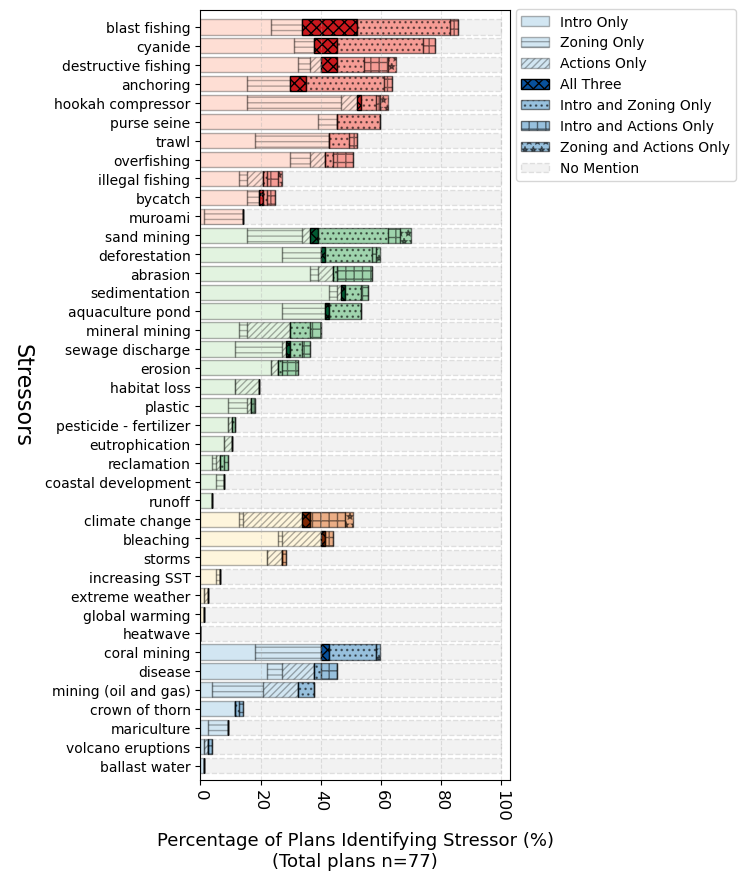

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data reading
# df_Intro, df_Zoning, df_Actions should be defined here

# Calculate the percentages instead of raw counts
def categorize_plans(df_intro, df_Zoning, df_actions, subcategories):
    # Create dictionaries to store the counts
    intro_only = {stressor: 0 for stressor in subcategories}
    zoning_only = {stressor: 0 for stressor in subcategories}
    actions_only = {stressor: 0 for stressor in subcategories}
    intro_and_zoning_only = {stressor: 0 for stressor in subcategories}
    intro_and_actions_only = {stressor: 0 for stressor in subcategories}
    zoning_and_actions_only = {stressor: 0 for stressor in subcategories}
    all_three = {stressor: 0 for stressor in subcategories}
    no_mention = {stressor: 0 for stressor in subcategories}
    total = {stressor: 0 for stressor in subcategories}

    for stressor in subcategories:
        plans_intro = set(df_intro[df_intro[stressor] > 0].index)
        plans_zoning = set(df_Zoning[df_Zoning[stressor] > 0].index)
        plans_actions = set(df_actions[df_actions[stressor] > 0].index)

        # Calculate combinations
        all_three_plans = plans_intro & plans_zoning & plans_actions
        intro_and_zoning_only_plans = (plans_intro & plans_zoning) - plans_actions
        intro_and_actions_only_plans = (plans_intro & plans_actions) - plans_zoning
        zoning_and_actions_only_plans = (plans_zoning & plans_actions) - plans_intro
        intro_only_plans = plans_intro - plans_zoning - plans_actions
        zoning_only_plans = plans_zoning - plans_intro - plans_actions
        actions_only_plans = plans_actions - plans_intro - plans_zoning

        # Update counts
        intro_only[stressor] = len(intro_only_plans)
        zoning_only[stressor] = len(zoning_only_plans)
        actions_only[stressor] = len(actions_only_plans)
        intro_and_zoning_only[stressor] = len(intro_and_zoning_only_plans)
        intro_and_actions_only[stressor] = len(intro_and_actions_only_plans)
        zoning_and_actions_only[stressor] = len(zoning_and_actions_only_plans)
        all_three[stressor] = len(all_three_plans)

        # Calculate the "No Mention" plans
        all_plans = set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index)
        mentioned_plans = plans_intro | plans_zoning | plans_actions
        no_mention[stressor] = len(all_plans - mentioned_plans)

        # Calculate the total plans mentioning the stressor
        total[stressor] = len(mentioned_plans)

    # Calculate the total number of plans across all datasets
    total_all = len(set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index))

    return (intro_only, zoning_only, actions_only, intro_and_zoning_only, 
            intro_and_actions_only, zoning_and_actions_only, all_three, 
            no_mention, total, total_all)

# Get the categorized counts for each stressor
intro_only_counts, zoning_only_counts, actions_only_counts, intro_and_zoning_only_counts, intro_and_actions_only_counts, zoning_and_actions_only_counts, all_three_counts, no_mention_counts, total_counts, total_all = categorize_plans(df_Intro, df_Zoning, df_Actions, all_subcategories)

# Create the DataFrame to hold the results, including Total Mention and Total All
results = {
    'Stressor': all_subcategories,
    'Intro Only': [intro_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Zoning Only': [zoning_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Actions Only': [actions_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Intro and Zoning Only': [intro_and_zoning_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Intro and Actions Only': [intro_and_actions_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Zoning and Actions Only': [zoning_and_actions_only_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'All Three': [all_three_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'No Mention': [no_mention_counts[stressor] / total_all * 100 for stressor in all_subcategories],
    'Total Mention': [intro_only_counts[stressor] + zoning_only_counts[stressor] + actions_only_counts[stressor] + 
                      intro_and_zoning_only_counts[stressor] + intro_and_actions_only_counts[stressor] + 
                      zoning_and_actions_only_counts[stressor] + all_three_counts[stressor] 
                      for stressor in all_subcategories],
    'Total All': [total_all for _ in all_subcategories]
}

# Create the results DataFrame
results_df = pd.DataFrame(results)

# Calculate a new total for sorting based on Intro, Zoning, Actions, and All Three only
results_df['New Total'] = (results_df['Intro Only'] + 
                           results_df['Zoning Only'] + 
                           results_df['Actions Only'] + 
                           results_df['Intro and Zoning Only'] + 
                           results_df['Intro and Actions Only'] + 
                           results_df['Zoning and Actions Only'] + 
                           results_df['All Three'])

# Prepare a DataFrame for sorting by category
results_df['Category'] = np.select(
    [
        results_df['Stressor'].isin(subcategories_fishing),
        results_df['Stressor'].isin(subcategories_landbased),
        results_df['Stressor'].isin(subcategories_climate),
        results_df['Stressor'].isin(subcategories_other)
    ],
    ['Fishing', 'Land-Based', 'Climate', 'Other'],
    default='Unknown'
)

# Define the specific order for categories
category_order = ['Other', 'Climate', 'Land-Based', 'Fishing']

# Sort the DataFrame by Category and then by New Total within each category
results_df['Category'] = pd.Categorical(results_df['Category'], categories=category_order, ordered=True)
results_df = results_df.sort_values(by=['Category', 'New Total'], ascending=[True, True])

# Prepare data for plotting
# Extract sorted stressors and counts based on the sorted DataFrame
sorted_stressors = results_df['Stressor'].tolist()
sorted_intro_counts = results_df['Intro Only'].tolist()
sorted_zoning_counts = results_df['Zoning Only'].tolist()
sorted_action_counts = results_df['Actions Only'].tolist()
sorted_all_three_counts = results_df['All Three'].tolist()
sorted_intro_and_zoning_counts = results_df['Intro and Zoning Only'].tolist()
sorted_intro_and_actions_counts = results_df['Intro and Actions Only'].tolist()
sorted_zoning_and_actions_counts = results_df['Zoning and Actions Only'].tolist()
sorted_no_mention_counts = results_df['No Mention'].tolist()

# Set up the horizontal bar graph
y = np.arange(len(sorted_stressors)) + 0.25
width = 0.5

# Create the figure and axes
fig, ax = plt.subplots(figsize=(4, 10))

# Define colors for categories based on your previous mapping
color_map = {
    'fishing': {
        '100': '#fc9272',  # Intro only
        '010': '#fc9272',  # Zoning only
        '001': '#fc9272',  # Actions only
        '110': '#ef3b2c',  # Intro and Zoning
        '101': '#ef3b2c',  # Intro and Actions
        '011': '#ef3b2c',  # Zoning and Actions
        '111': '#cb181d'   # All three
    },
    'landbased': {
        '100': '#a1d99b',  # Intro only
        '010': '#a1d99b',  # Zoning only
        '001': '#a1d99b',  # Actions only
        '110': '#41ab5d',  # Intro and Zoning
        '101': '#41ab5d',  # Intro and Actions
        '011': '#41ab5d',  # Zoning and Actions
        '111': '#005a32'   # All three
    },
    'climate': {
        '100': '#fee08b',  # Intro only
        '010': '#fee08b',  # Zoning only
        '001': '#fee08b',  # Actions only
        '110': '#d95f0e',  # Intro and Zoning
        '101': '#d95f0e',  # Intro and Actions
        '011': '#d95f0e',  # Zoning and Actions
        '111': '#7f2704'   # All three
    },
    'other': {
        '100': '#6baed6',  # Intro only
        '010': '#6baed6',  # Zoning only
        '001': '#6baed6',  # Actions only
        '110': '#3182bd',  # Intro and Zoning
        '101': '#3182bd',  # Intro and Actions
        '011': '#3182bd',  # Zoning and Actions
        '111': '#08519c'   # All three
    },
}

# Create the stacked bars
for i, stressor in enumerate(sorted_stressors):
    # Determine the category for the stressor
    if stressor in subcategories_fishing:
        category = 'fishing'
    elif stressor in subcategories_landbased:
        category = 'landbased'
    elif stressor in subcategories_climate:
        category = 'climate'
    elif stressor in subcategories_other:
        category = 'other'
    else:
        category = None

    cumulative_left = 0

    # Define the bar colors based on the combination
    intro_bar = ax.barh(y[i], sorted_intro_counts[i], 
                        color=color_map[category]['100'], alpha=0.3, hatch='', linestyle='-', label='Intro Only' if i == 0 else "", edgecolor='black')
    cumulative_left += sorted_intro_counts[i]  # Increment cumulative left position

    zoning_bar = ax.barh(y[i], sorted_zoning_counts[i], left=cumulative_left, 
                          color=color_map[category]['010'], alpha=0.3, hatch='---', label='Zoning Only' if i == 0 else "", edgecolor='black', linestyle='-')
    cumulative_left += sorted_zoning_counts[i]  # Increment cumulative left position

    action_bar = ax.barh(y[i], sorted_action_counts[i], left=cumulative_left, 
                          color=color_map[category]['001'], alpha=0.3, hatch='/////', label='Actions Only' if i == 0 else "", edgecolor='black', linestyle='-')
    cumulative_left += sorted_action_counts[i]  # Increment cumulative left position

    all_three_bar = ax.barh(y[i], sorted_all_three_counts[i], left=cumulative_left, 
                             color=color_map[category]['111'], alpha=1, label='All Three' if i == 0 else "", hatch='xxx', edgecolor='black')
    cumulative_left += sorted_all_three_counts[i]  # Increment cumulative left position

    # Set color explicitly for these specific combinations
    intro_and_zoning_bar = ax.barh(y[i], sorted_intro_and_zoning_counts[i], left=cumulative_left, 
                                    color=color_map[category]['110'], alpha=0.5, hatch='...', label='Intro and Zoning Only' if i == 0 else "", 
                                    edgecolor='black')
    cumulative_left += sorted_intro_and_zoning_counts[i]  # Increment cumulative left position

    intro_and_actions_bar = ax.barh(y[i], sorted_intro_and_actions_counts[i], left=cumulative_left, 
                                     color=color_map[category]['101'], alpha=0.5, hatch='++', label='Intro and Actions Only' if i == 0 else "", 
                                     edgecolor='black')
    cumulative_left += sorted_intro_and_actions_counts[i]  # Increment cumulative left position

    zoning_and_actions_bar = ax.barh(y[i], sorted_zoning_and_actions_counts[i], left=cumulative_left, 
                                      color=color_map[category]['011'], alpha=0.5, hatch='**', label='Zoning and Actions Only' if i == 0 else "", 
                                      edgecolor='black')
    cumulative_left += sorted_zoning_and_actions_counts[i]  # Increment cumulative left position

    # Plot the no mention bars
    no_mention_bar = ax.barh(y[i], sorted_no_mention_counts[i], left=cumulative_left, 
                             color='gray', alpha=0.1, label='No Mention' if i == 0 else "", 
                             edgecolor='black', linestyle='--')
    cumulative_left += sorted_no_mention_counts[i]

# Set labels, title, and legend
ax.set_xlabel('Percentage of Plans Identifying Stressor (%)\n(Total plans n=77)', labelpad=7, fontsize=13)
ax.set_ylabel('Stressors', fontsize=16, rotation=270, labelpad=25)

#ax.set_title('Percentage of Plans Mentioning Stressors by Category')
ax.set_yticks(y)
ax.set_yticklabels(sorted_stressors)
ax.legend(loc='upper right', bbox_to_anchor=(1.75, 1.01))
# Add gridlines
ax.grid(axis='x', linestyle='--', alpha=0.35)

# Rotate x-tick labels using plt.xticks()
plt.xlim(0, 103)
plt.xticks([0, 20, 40, 60, 80, 100], rotation=270, fontsize=12)

# Adjust the distance from the outline by setting y-limits
padding_y = 0.5  # Space above and below bars
ax.set_ylim(-padding_y, len(sorted_stressors) + 0.15)

# Display plot
plt.tight_layout()

# Save plot
output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'  # Change this to your desired directory
output_file_path = output_directory + 'fixed_clean.pdf'
plt.savefig(output_file_path, dpi=600, bbox_inches='tight')  # Adjust DPI if needed

plt.show()


C:\Users\capri002\AppData\Local\Temp\ipykernel_30276\17812407.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


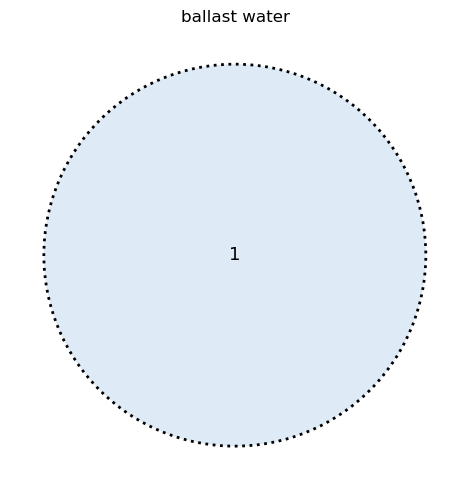

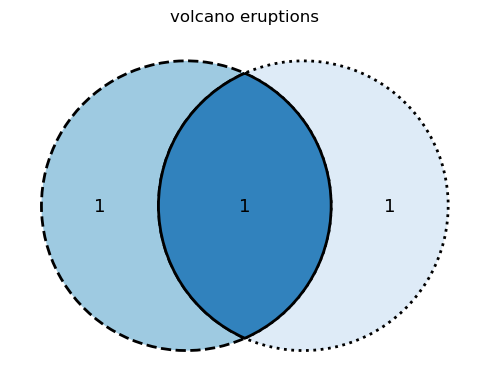

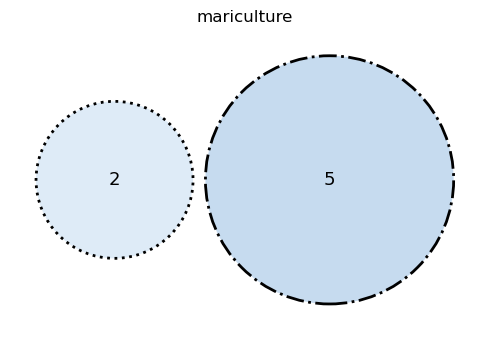

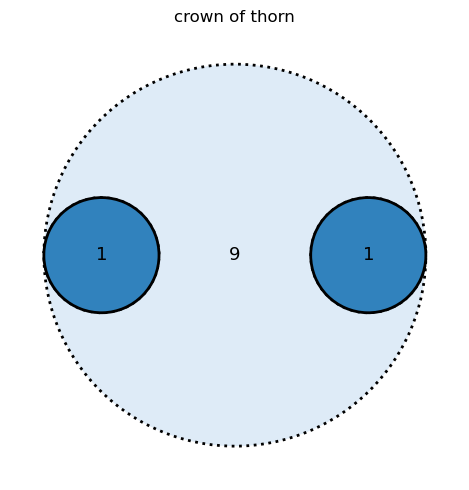

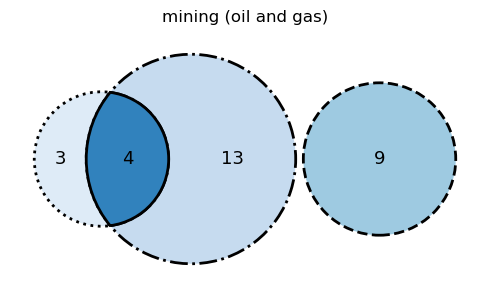

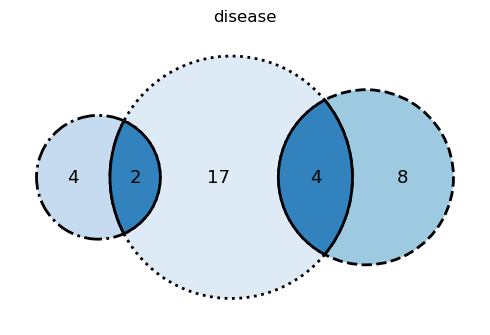

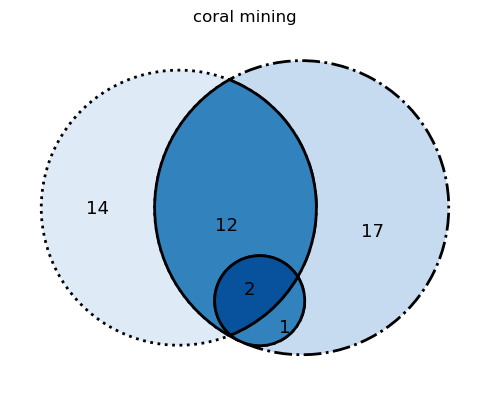

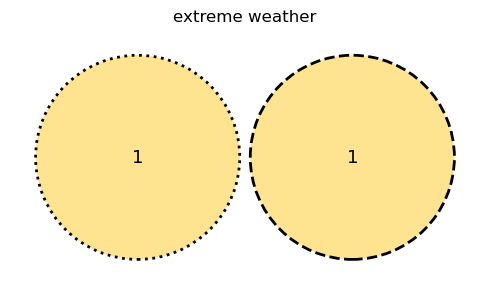

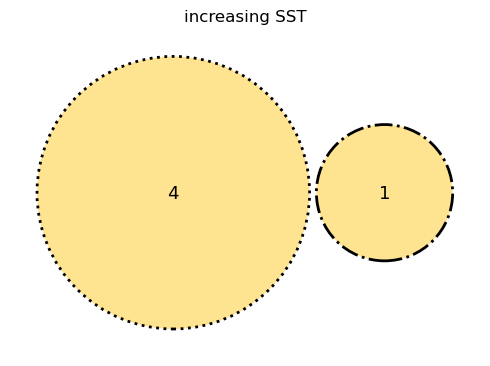

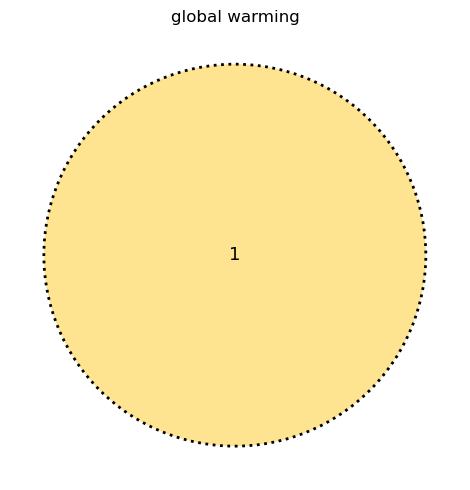

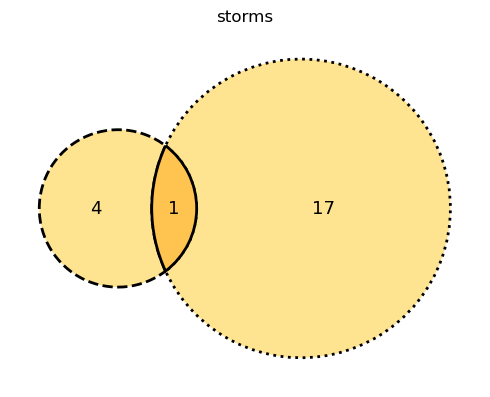

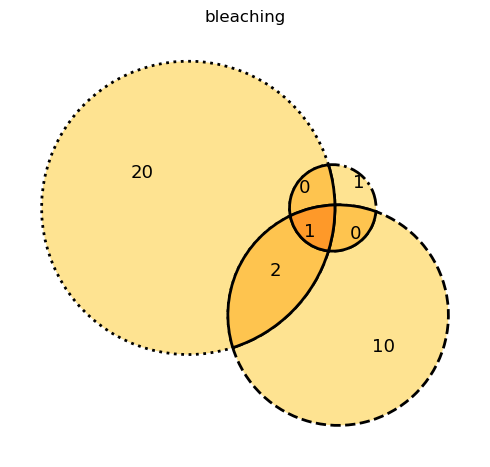

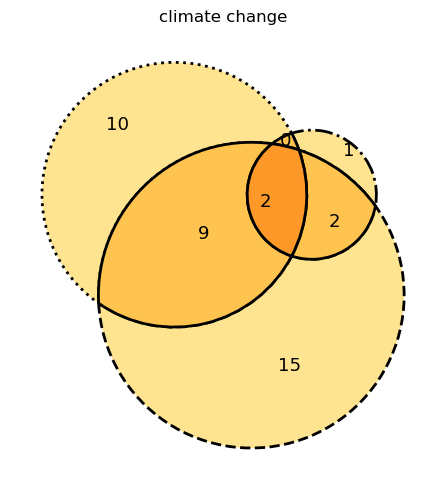

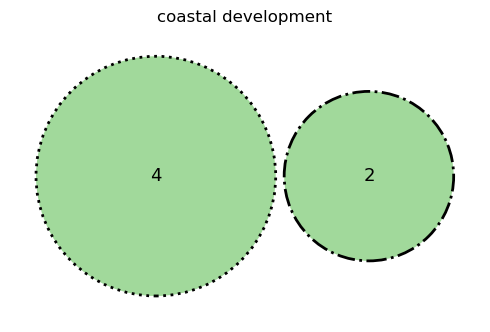

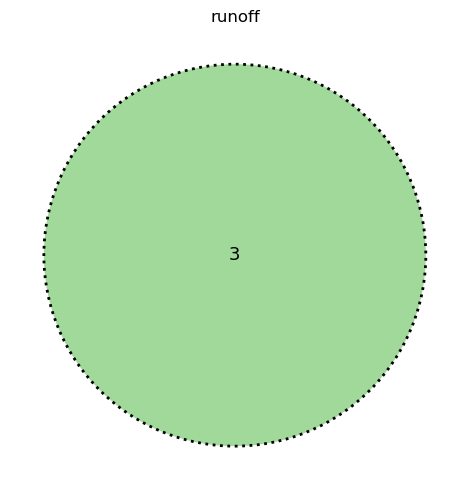

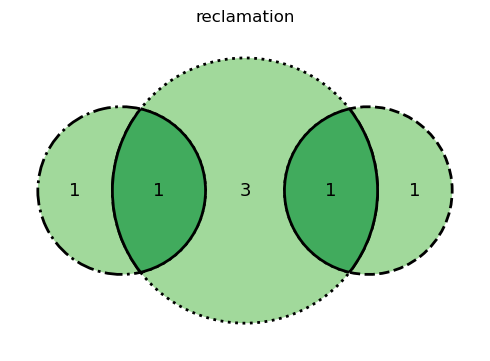

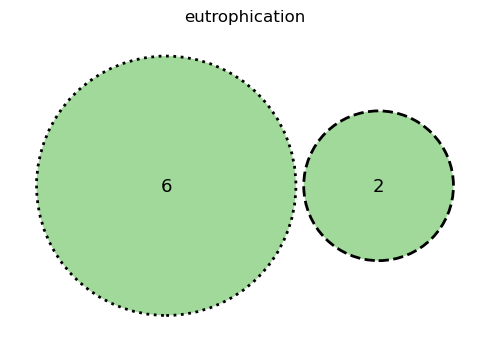

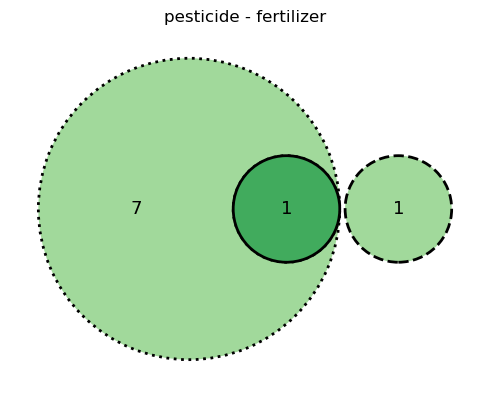

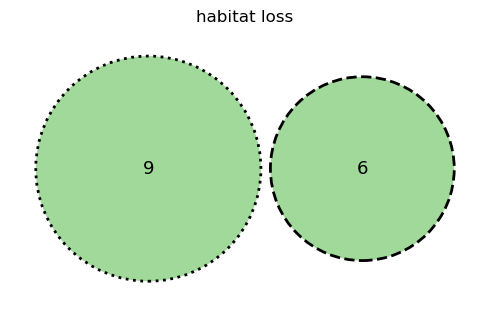

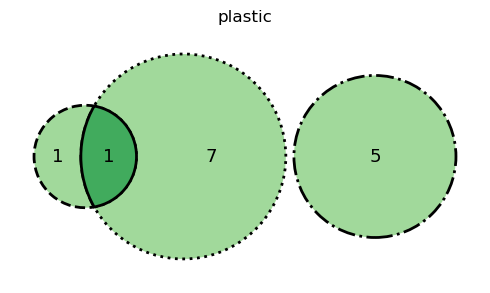

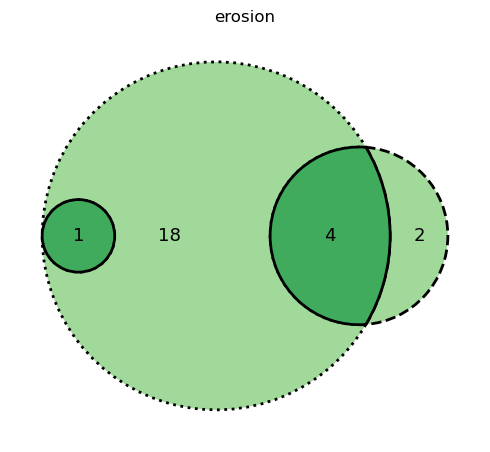

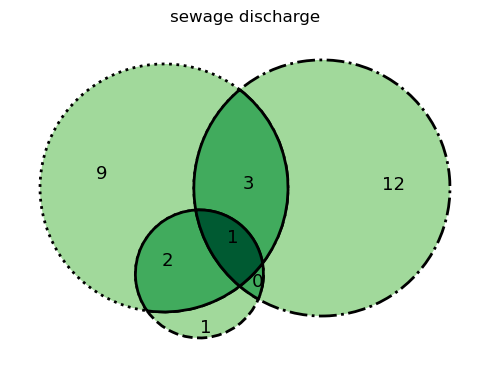

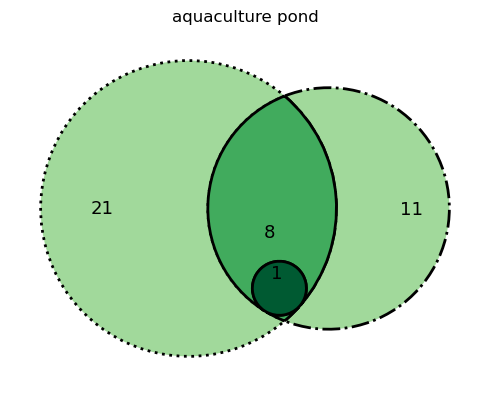

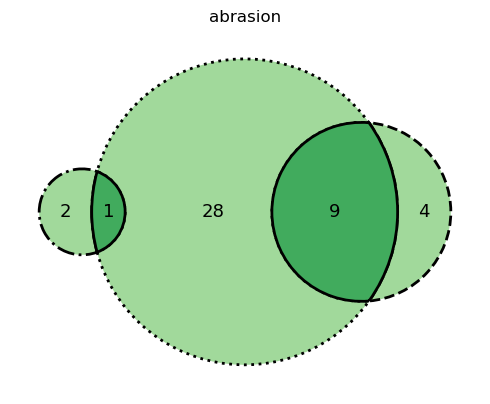

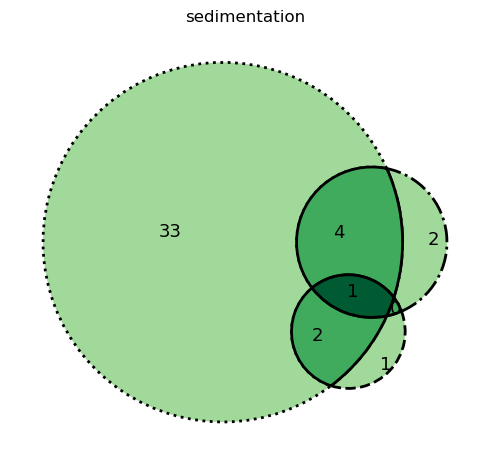

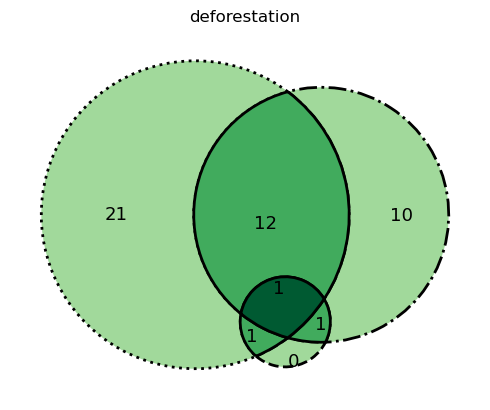

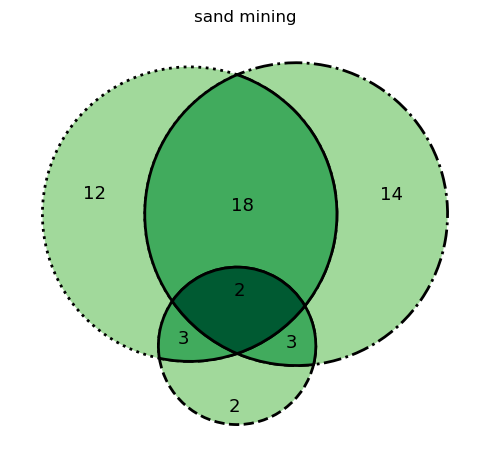

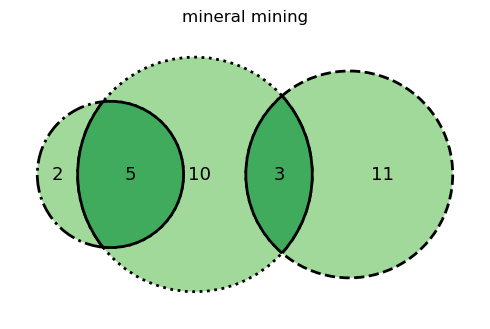

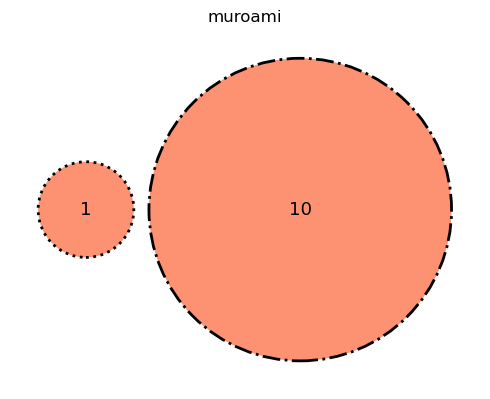

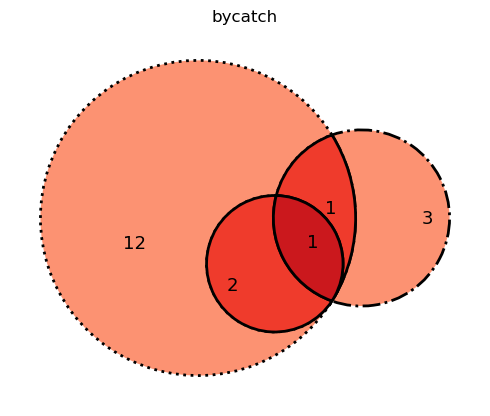

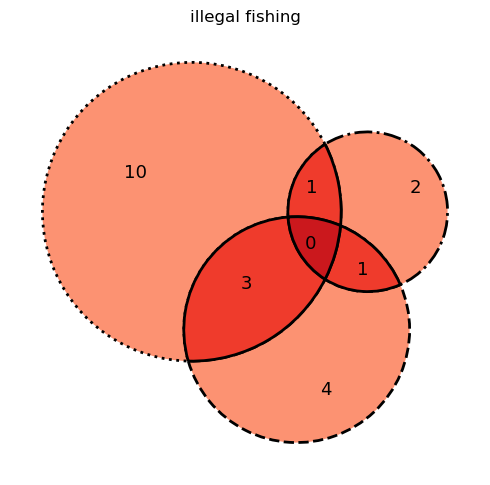

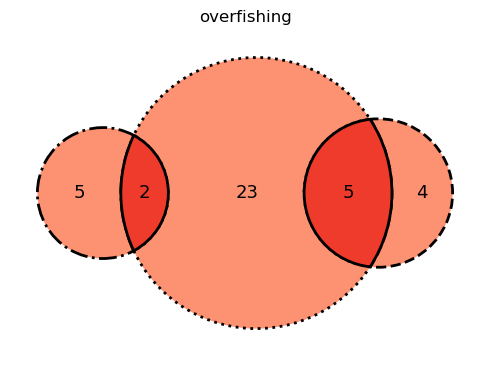

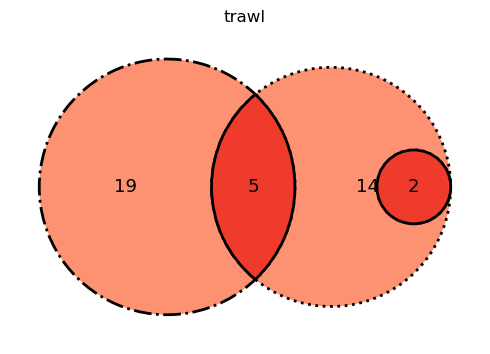

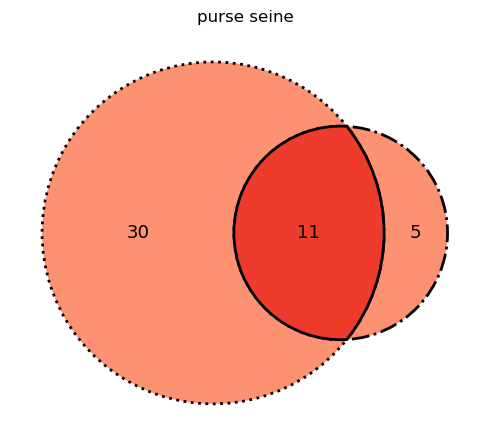

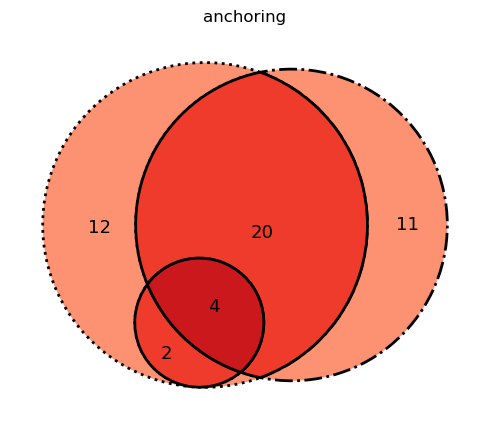

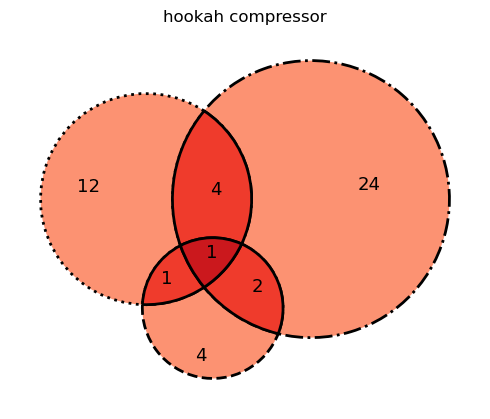

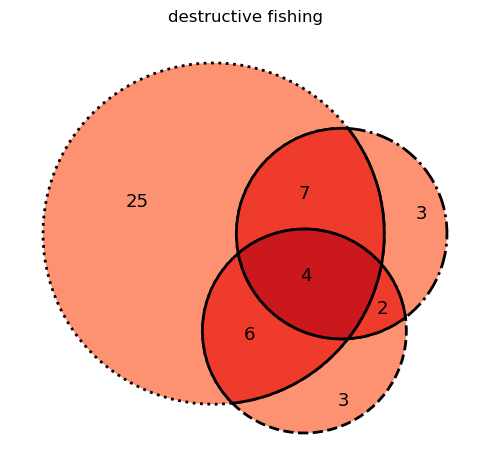

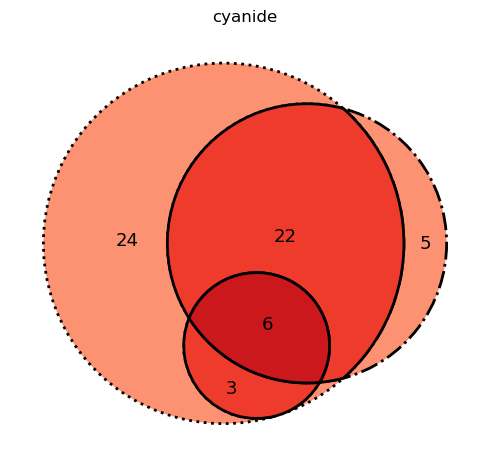

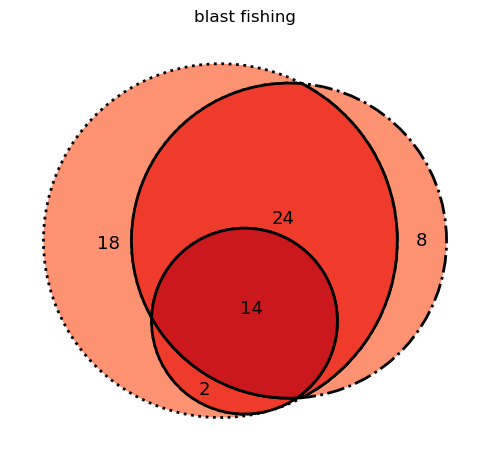

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import os
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib_venn')

# Read the Intro data
df_Intro = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/Absolute_keyword_count_Intro.xlsx')

# Read the Zoning data
df_Zoning = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/Absolute_keyword_count_Zoning.xlsx')

# Read the Action data
df_Actions = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/Absolute_keyword_count_Actions.xlsx')

# Rename the column "bombing" to "blast fishing" in all three dataframes
df_Intro.rename(columns={'bombing': 'blast fishing'}, inplace=True)
df_Zoning.rename(columns={'bombing': 'blast fishing'}, inplace=True)
df_Actions.rename(columns={'bombing': 'blast fishing'}, inplace=True)

# Define subcategories for all stressors grouped by category
subcategories_fishing = [
    'muroami', 'bycatch', 'illegal fishing', 'overfishing', 'trawl', 'purse seine',
    'anchoring', 'hookah compressor', 'destructive fishing', 'cyanide', 'blast fishing'
]

subcategories_landbased = [
    'coastal development', 'runoff', 'reclamation', 'eutrophication',
    'pesticide - fertilizer', 'habitat loss', 'plastic', 'erosion',
    'sewage discharge', 'aquaculture pond', 'abrasion', 'sedimentation',
    'deforestation', 'sand mining', 'mineral mining'
]

subcategories_climate = [
    'heatwave', 'extreme weather', 'increasing SST', 'global warming',
    'storms', 'bleaching', 'climate change'
]

subcategories_other = [
    'ballast water', 'volcano eruptions', 'mariculture',
    'crown of thorn', 'mining (oil and gas)', 'disease', 'coral mining'
]

# List of all subcategories (stressors)
all_subcategories = subcategories_other + subcategories_climate + subcategories_landbased + subcategories_fishing

# Function to categorize plans mentioning each stressor in Intro, Zoning, and Actions
def categorize_plans(df_intro, df_Zoning, df_actions, subcategories):
    # Create dictionaries to store the counts
    intro_only = {stressor: 0 for stressor in subcategories}
    zoning_only = {stressor: 0 for stressor in subcategories}
    actions_only = {stressor: 0 for stressor in subcategories}
    intro_and_zoning_only = {stressor: 0 for stressor in subcategories}
    intro_and_actions_only = {stressor: 0 for stressor in subcategories}
    zoning_and_actions_only = {stressor: 0 for stressor in subcategories}
    all_three = {stressor: 0 for stressor in subcategories}
    no_mention = {stressor: 0 for stressor in subcategories}  # New: For plans with no mention
    total = {stressor: 0 for stressor in subcategories}  # New: For total mentions

    for stressor in subcategories:
        plans_intro = set(df_intro[df_intro[stressor] > 0].index)
        plans_zoning = set(df_Zoning[df_Zoning[stressor] > 0].index)
        plans_actions = set(df_actions[df_actions[stressor] > 0].index)

        # Calculate combinations
        all_three_plans = plans_intro & plans_zoning & plans_actions
        intro_and_zoning_only_plans = (plans_intro & plans_zoning) - plans_actions
        intro_and_actions_only_plans = (plans_intro & plans_actions) - plans_zoning
        zoning_and_actions_only_plans = (plans_zoning & plans_actions) - plans_intro
        intro_only_plans = plans_intro - plans_zoning - plans_actions
        zoning_only_plans = plans_zoning - plans_intro - plans_actions
        actions_only_plans = plans_actions - plans_intro - plans_zoning

        # Update counts
        intro_only[stressor] = len(intro_only_plans)
        zoning_only[stressor] = len(zoning_only_plans)
        actions_only[stressor] = len(actions_only_plans)
        intro_and_zoning_only[stressor] = len(intro_and_zoning_only_plans)
        intro_and_actions_only[stressor] = len(intro_and_actions_only_plans)
        zoning_and_actions_only[stressor] = len(zoning_and_actions_only_plans)
        all_three[stressor] = len(all_three_plans)

        # Calculate the "No Mention" plans (those not in any of the three categories)
        all_plans = set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index)
        mentioned_plans = plans_intro | plans_zoning | plans_actions
        no_mention[stressor] = len(all_plans - mentioned_plans)  # New: Count plans that mention nothing

        # Calculate the total plans mentioning the stressor
        total[stressor] = len(mentioned_plans)  # New: Count of all plans that mention the stressor

    # Calculate the total number of plans across all datasets
    total_all = len(set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index))

    return intro_only, zoning_only, actions_only, intro_and_zoning_only, intro_and_actions_only, zoning_and_actions_only, all_three, no_mention, total, total_all

# Get the categorized counts for each stressor
intro_only_counts, zoning_only_counts, actions_only_counts, intro_and_zoning_only_counts, intro_and_actions_only_counts, zoning_and_actions_only_counts, all_three_counts, no_mention_counts, total_counts, total_all = categorize_plans(df_Intro, df_Zoning, df_Actions, all_subcategories)

# Create the DataFrame to hold the results, including Total Mention and Total All
results = {
    'Stressor': all_subcategories,
    'Intro Only': [intro_only_counts[stressor] for stressor in all_subcategories],
    'Zoning Only': [zoning_only_counts[stressor] for stressor in all_subcategories],
    'Actions Only': [actions_only_counts[stressor] for stressor in all_subcategories],
    'Intro and Zoning Only': [intro_and_zoning_only_counts[stressor] for stressor in all_subcategories],
    'Intro and Actions Only': [intro_and_actions_only_counts[stressor] for stressor in all_subcategories],
    'Zoning and Actions Only': [zoning_and_actions_only_counts[stressor] for stressor in all_subcategories],
    'All Three': [all_three_counts[stressor] for stressor in all_subcategories],
    'No Mention': [no_mention_counts[stressor] for stressor in all_subcategories],  # New: No Mention column
    'Total Mention': [intro_only_counts[stressor] + zoning_only_counts[stressor] + actions_only_counts[stressor] + 
                      intro_and_zoning_only_counts[stressor] + intro_and_actions_only_counts[stressor] + 
                      zoning_and_actions_only_counts[stressor] + all_three_counts[stressor] 
                      for stressor in all_subcategories],  # New: Total Mention column
    'Total All': [total_all for _ in all_subcategories]  # New: Total All column, same for all stressors
}

# Create the results DataFrame
results_df = pd.DataFrame(results)

# Define colors for categories
color_dict = {
    'fishing': '#cb181d',   # Red for Fishing
    'landbased': '#74c476', # Green for Land-Based
    'climate': '#ec7014', #fd8d3c',   # Orange for Climate-Related
    'other': '#6baed6'      # Blue for Other
}

# Function to determine the category of a stressor
def get_stressor_category(stressor):
    if stressor in subcategories_fishing:
        return 'fishing'
    elif stressor in subcategories_landbased:
        return 'landbased'
    elif stressor in subcategories_climate:
        return 'climate'
    elif stressor in subcategories_other:
        return 'other'
    return None

# Function to plot Venn diagram for each stressor with category-specific custom colors
def plot_venn_for_stressor(stressor, intro_only, zoning_only, actions_only, intro_and_zoning, intro_and_actions, zoning_and_actions, all_three, output_directory):
    category = get_stressor_category(stressor)

    # Create a Venn diagram for the stressor
    plt.figure(figsize=(5, 5))
    venn = venn3(subsets=(
        intro_only,  # Plans mentioning the stressor only in Intro
        zoning_only,  # Plans mentioning the stressor only in Zoning
        intro_and_zoning,  # Plans mentioning the stressor in both Intro and Zoning, but not Actions
        actions_only,  # Plans mentioning the stressor only in Actions
        intro_and_actions,  # Plans mentioning the stressor in both Intro and Actions, but not Zoning
        zoning_and_actions,  # Plans mentioning the stressor in both Zoning and Actions, but not Intro
        all_three  # Plans mentioning the stressor in all three: Intro, Zoning, and Actions
    ), set_labels=('Intro', 'Zoning', 'Actions'))

    # Define colors for each section based on the category of the stressor
    if category == 'fishing':
        color_map = {
            '100': '#fc9272',  # Intro only
            '010': '#fc9272',  # Zoning only
            '001': '#fc9272',  # Actions only
            '110': '#ef3b2c',  # Intro and Zoning ef3b2c
            '101': '#ef3b2c',  # Intro and Actions#ef3b2c
            '011': '#ef3b2c',  # Zoning and Actions
            '111': '#cb181d'   # All three
        }
    elif category == 'landbased':
        color_map = {
            '100': '#a1d99b',  # Intro only
            '010': '#a1d99b',  # Zoning only
            '001': '#a1d99b',  # Actions only
            '110': '#41ab5d',  # Intro and Zoning
            '101': '#41ab5d',  # Intro and Actions
            '011': '#41ab5d',  # Zoning and Actions
            '111': '#005a32'   # All three
        }
    elif category == 'climate':
        color_map = {
            '100': '#fee391',  # Intro only
            '010': '#fee391',  # Zoning only
            '001': '#fee391',  # Actions only
            '110': '#fec44f',  # Intro and Zoning
            '101': '#fec44f',  # Intro and Actions
            '011': '#fec44f',  # Zoning and Actions
            '111': '#fe9929'   # All three
        }
    elif category == 'other':
        color_map = {
            '100': '#deebf7',  # Intro only
            '010': '#c6dbef',  # Zoning only
            '001': '#9ecae1',  # Actions only
            '110': '#3182bd',  # Intro and Zoning
            '101': '#3182bd',  # Intro and Actions
            '011': '#3182bd',  # Zoning and Actions
            '111': '#08519c'   # All three
        }
 #   else:
        # Fallback color (if category not found)
  #      color_map = {
          #  '100': 'grey',
           # '010': 'grey',
            #'001': 'grey',
            #'110': 'grey',
        #    '101': 'grey',
         #   '011': 'grey',
      #      '111': 'grey'
      #  }

    # Assigning the specified color to the circles based on the combination
    for patch_id in ['100', '010', '001', '110', '101', '011', '111']:
        patch = venn.get_patch_by_id(patch_id)
        if patch is not None:
            patch.set_facecolor(color_map[patch_id])
            patch.set_alpha(1)  # Set alpha, can be adjusted as needed
            patch.set_edgecolor('black')  # Set outline color to black
            patch.set_linewidth(2)         # Set outline width

            # Set different line styles for each patch
            if patch_id == '100':  # Intro only
                patch.set_linestyle(':')  # Dashed line
            elif patch_id == '010':  # Zoning only
                patch.set_linestyle('-.')  # Dotted line
            elif patch_id == '001':  # Actions only
                patch.set_linestyle('--')  # Dash-dot line
            # Line styles for combined categories
            elif patch_id in ['110', '101', '011']:  # Any combination of two
                patch.set_linestyle('-')  # Solid line
            elif patch_id == '111':  # All three
                patch.set_linestyle('solid')  # Solid line 

    # Set title with stressor name
    plt.title(f'{stressor}')

    # Hide the labels for the set
    for label in venn.set_labels:
        if label is not None:
            label.set_visible(False)  # Hide the label change it into False - show the label True

    # Set font size for the counts
    for label_id in ['100', '010', '001', '110', '101', '011', '111']:
        label = venn.get_label_by_id(label_id)
        if label is not None:
            label.set_fontsize(13)  # Set the font size for the count labels

    # Create legend with black color for each dashed line
  #  handles = [
   #     plt.Line2D([0], [0], color='black', linestyle=':', linewidth=2, label='Intro '),
    #    plt.Line2D([0], [0], color='black', linestyle='-.', linewidth=2, label='Zoning'),
     #   plt.Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Actions'),
    #]
    #plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.5,0.85))

    # Save the plot as a PDF
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(os.path.join(output_directory, f'{stressor}.pdf'), format='pdf', dpi=1500, bbox_inches='tight')
#    plt.close()  # Close the plot to free up memory

# Calculate total plans and filter results where total plans > 30
results_df['Total Plans'] = results_df[['Intro Only', 'Zoning Only', 'Actions Only',
                                         'Intro and Zoning Only', 'Intro and Actions Only',
                                         'Zoning and Actions Only', 'All Three']].sum(axis=1)

# Filter the DataFrame for stressors with total plans > 30
filtered_results_df = results_df[results_df['Total Plans'] > 0]

# Define output directory for saving plots
output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/Venn_Diagrams_no_legend'

os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Loop through each stressor in the filtered results and plot the Venn diagram
for index, row in filtered_results_df.iterrows():
    plot_venn_for_stressor(
        row['Stressor'],
        row['Intro Only'],
        row['Zoning Only'],
        row['Actions Only'],
        row['Intro and Zoning Only'],
        row['Intro and Actions Only'],
        row['Zoning and Actions Only'],
        row['All Three'],
        output_directory
    )


In [9]:
# Function to categorize plans mentioning each stressor in Intro, Zoning, and Actions
def categorize_plans_with_filenames(df_intro, df_Zoning, df_actions, subcategories):
    # Create dictionaries to store the counts and file names
    intro_only = {stressor: [] for stressor in subcategories}
    zoning_only = {stressor: [] for stressor in subcategories}
    actions_only = {stressor: [] for stressor in subcategories}
    intro_and_zoning_only = {stressor: [] for stressor in subcategories}
    intro_and_actions_only = {stressor: [] for stressor in subcategories}
    zoning_and_actions_only = {stressor: [] for stressor in subcategories}
    all_three = {stressor: [] for stressor in subcategories}
    no_mention = {stressor: [] for stressor in subcategories}  # New: For plans with no mention
    total = {stressor: [] for stressor in subcategories}  # New: For total mentions

    for stressor in subcategories:
        # Get plans for each category
        plans_intro = set(df_intro[df_intro[stressor] > 0].index)
        plans_zoning = set(df_Zoning[df_Zoning[stressor] > 0].index)
        plans_actions = set(df_actions[df_actions[stressor] > 0].index)

        # Calculate combinations
        all_three_plans = plans_intro & plans_zoning & plans_actions
        intro_and_zoning_only_plans = (plans_intro & plans_zoning) - plans_actions
        intro_and_actions_only_plans = (plans_intro & plans_actions) - plans_zoning
        zoning_and_actions_only_plans = (plans_zoning & plans_actions) - plans_intro
        intro_only_plans = plans_intro - plans_zoning - plans_actions
        zoning_only_plans = plans_zoning - plans_intro - plans_actions
        actions_only_plans = plans_actions - plans_intro - plans_zoning

        # Update file names
        intro_only[stressor] = df_intro.loc[list(intro_only_plans), 'File Name'].tolist()  # Convert to list
        zoning_only[stressor] = df_Zoning.loc[list(zoning_only_plans), 'File Name'].tolist()  # Convert to list
        actions_only[stressor] = df_Actions.loc[list(actions_only_plans), 'File Name'].tolist()  # Convert to list
        intro_and_zoning_only[stressor] = df_intro.loc[list(intro_and_zoning_only_plans), 'File Name'].tolist()  # Convert to list
        intro_and_actions_only[stressor] = df_intro.loc[list(intro_and_actions_only_plans), 'File Name'].tolist()  # Convert to list
        zoning_and_actions_only[stressor] = df_Zoning.loc[list(zoning_and_actions_only_plans), 'File Name'].tolist()  # Convert to list
        all_three[stressor] = df_intro.loc[list(all_three_plans), 'File Name'].tolist()  # Convert to list

        # Calculate the "No Mention" plans (those not in any of the three categories)
        all_plans = set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index)
        mentioned_plans = plans_intro | plans_zoning | plans_actions
        no_mention[stressor] = df_intro.loc[list(all_plans - mentioned_plans), 'File Name'].tolist()  # Convert to list

        # Calculate the total plans mentioning the stressor
        total[stressor] = df_intro.loc[list(mentioned_plans), 'File Name'].tolist()  # Convert to list

    # Calculate the total number of plans across all datasets
    total_all = len(set(df_intro.index) | set(df_Zoning.index) | set(df_actions.index))

    return (intro_only, zoning_only, actions_only, intro_and_zoning_only, 
            intro_and_actions_only, zoning_and_actions_only, all_three, 
            no_mention, total, total_all)

# Get the categorized counts and file names for each stressor
intro_only_files, zoning_only_files, actions_only_files, intro_and_zoning_only_files, intro_and_actions_only_files, zoning_and_actions_only_files, all_three_files, no_mention_files, total_files, total_all = categorize_plans_with_filenames(df_Intro, df_Zoning, df_Actions, all_subcategories)

# Create the DataFrame to hold the results
results = {
    'Stressor': all_subcategories,
    'Intro Only': [intro_only_files[stressor] for stressor in all_subcategories],
    'Zoning Only': [zoning_only_files[stressor] for stressor in all_subcategories],
    'Actions Only': [actions_only_files[stressor] for stressor in all_subcategories],
    'Intro and Zoning Only': [intro_and_zoning_only_files[stressor] for stressor in all_subcategories],
    'Intro and Actions Only': [intro_and_actions_only_files[stressor] for stressor in all_subcategories],
    'Zoning and Actions Only': [zoning_and_actions_only_files[stressor] for stressor in all_subcategories],
    'All Three': [all_three_files[stressor] for stressor in all_subcategories],
    'No Mention': [no_mention_files[stressor] for stressor in all_subcategories],  # New: No Mention column
    'Total Mention': [total_files[stressor] for stressor in all_subcategories],  # New: Total Mention column
    'Total All': [total_all for _ in all_subcategories]  # New: Total All column, same for all stressors
}

# Create the results DataFrame
results_df = pd.DataFrame(results)

# Display results
for index, row in results_df.iterrows():
    print(f"\nStressor: {row['Stressor']}")
    print(f"Intro Only Files: {row['Intro Only']}")
    print(f"Zoning Only Files: {row['Zoning Only']}")
    print(f"Actions Only Files: {row['Actions Only']}")
    print(f"Intro and Zoning Only Files: {row['Intro and Zoning Only']}")
    print(f"Intro and Actions Only Files: {row['Intro and Actions Only']}")
    print(f"Zoning and Actions Only Files: {row['Zoning and Actions Only']}")
    print(f"All Three Files: {row['All Three']}")
    print(f"No Mention Files: {row['No Mention']}")
    print(f"Total Mention Files: {row['Total Mention']}")
    print(f"Total All Plans: {row['Total All']}")



Stressor: ballast water
Intro Only Files: ['Provincial_Kaimana_West Papua_2018_Intro']
Zoning Only Files: []
Actions Only Files: []
Intro and Zoning Only Files: []
Intro and Actions Only Files: []
Zoning and Actions Only Files: []
All Three Files: []
No Mention Files: ['National_Anambas_Riau Islands_2014_Intro', 'National_Aru Tenggara_Maluku_2014_Intro', 'National_Banda_Maluku_2014_Intro', 'National_Gili Matra_West Nusa Tenggara_2014_Intro', 'National_Kapoposang_South Sulawesi_2014_Intro', 'National_Padaido_Papua_2014_Intro', 'National_Pieh_West Sumatra_2014_Intro', 'National_Raja Ampat_West Papua_2014_Intro', 'National_Sawu_East Nusa Tenggara_2014_Intro', 'National_Waigeo Sebelah Barat_West Papua_2014_Intro', 'Provincial_Aceh Besar_Aceh_2019_Intro', 'Provincial_Aceh Jaya_Aceh_2019_Intro', 'Provincial_Aceh Tamiang_Aceh_2020_Intro', 'Provincial_Alor Selat Pantar_East Nusa Tenggara_2013_Intro', 'Provincial_Angsana_South Kalimantan_2019_Intro', 'Provincial_Ay Rhun_Maluku_2020_Intro', 'Pr

In [10]:
results_df

,Stressor,Intro Only,Zoning Only,Actions Only,Intro and Zoning Only,Intro and Actions Only,Zoning and Actions Only,All Three,No Mention,Total Mention,Total All
0,ballast water,[Provincial_Kaimana_West Papua_2018_Intro],[],[],[],[],[],[],"[National_Anambas_Riau Islands_2014_Intro, Nat...",[Provincial_Kaimana_West Papua_2018_Intro],77
1,volcano eruptions,[Provincial_Flores Timur_East Nusa Tenggara_20...,[],[National_Sawu_East Nusa Tenggara_2014_Managem...,[],[National_Banda_Maluku_2014_Intro],[],[],"[National_Anambas_Riau Islands_2014_Intro, Nat...",[Provincial_Flores Timur_East Nusa Tenggara_20...,77
2,mariculture,"[Provincial_Kaimana_West Papua_2018_Intro, Pro...","[National_Anambas_Riau Islands_2014_Zoning, Pr...",[],[],[],[],[],"[National_Aru Tenggara_Maluku_2014_Intro, Nati...","[Provincial_Kaimana_West Papua_2018_Intro, Nat...",77
3,crown of thorn,[National_Kapoposang_South Sulawesi_2014_Intro...,[],[],[National_Anambas_Riau Islands_2014_Intro],[Provincial_Sikka_East Nusa Tenggara_2016_Intro],[],[],"[National_Aru Tenggara_Maluku_2014_Intro, Nati...","[National_Anambas_Riau Islands_2014_Intro, Nat...",77
4,mining (oil and gas),"[Provincial_Bintan_Riau Islands_2021_Intro, Pr...",[Provincial_Senggora Sepagar_Central Kalimanta...,[Provincial_Keramat Bedil Temudong_West Nusa T...,"[Provincial_Kaimana_West Papua_2018_Intro, Pro...",[],[],[],"[National_Anambas_Riau Islands_2014_Intro, Nat...",[Provincial_Senggora Sepagar_Central Kalimanta...,77
5,disease,"[Provincial_Kei_Maluku_2015_Intro, National_Gi...","[National_Anambas_Riau Islands_2014_Zoning, Na...",[Provincial_Senggora Sepagar_Central Kalimanta...,[Provincial_Kepulauan Balabalakang_West Sulawe...,[Provincial_Selat Bunga Laut_West Sumatra_2015...,[],[],"[National_Aru Tenggara_Maluku_2014_Intro, Nati...","[National_Anambas_Riau Islands_2014_Intro, Nat...",77
6,coral mining,"[National_Anambas_Riau Islands_2014_Intro, Nat...",[National_Gili Matra_West Nusa Tenggara_2014_Z...,[],[Provincial_Senggora Sepagar_Central Kalimanta...,[],[Provincial_Raja Ampat_West Papua_2019_Zoning],"[National_Sawu_East Nusa Tenggara_2014_Intro, ...","[National_Pieh_West Sumatra_2014_Intro, Provin...","[National_Anambas_Riau Islands_2014_Intro, Nat...",77
7,heatwave,[],[],[],[],[],[],[],"[National_Anambas_Riau Islands_2014_Intro, Nat...",[],77
8,extreme weather,[Provincial_Aceh Besar_Aceh_2019_Intro],[],[Provincial_Kaimana_West Papua_2018_Management...,[],[],[],[],"[National_Anambas_Riau Islands_2014_Intro, Nat...","[Provincial_Kaimana_West Papua_2018_Intro, Pro...",77
9,increasing SST,[Provincial_Flores Timur_East Nusa Tenggara_20...,[Provincial_Belitung_Belitung Islands_2019_Zon...,[],[],[],[],[],"[National_Anambas_Riau Islands_2014_Intro, Nat...",[Provincial_Senggora Sepagar_Central Kalimanta...,77


In [11]:
# Save the results DataFrame to an Excel file
output_file = 'categorized_plans_results.xlsx'
results_df.to_excel(output_file, index=False)

print(f"Results have been saved to {output_file}")

Results have been saved to categorized_plans_results.xlsx


In [12]:
def get_plan_names_without_specific_stressors(df_intro, df_zoning, df_actions, stressors_to_exclude):
    """
    Get plan names that do not mention specific stressors in any section (Intro, Zoning, Actions).

    Parameters:
        df_intro (pd.DataFrame): Intro DataFrame with stressor mentions.
        df_zoning (pd.DataFrame): Zoning DataFrame with stressor mentions.
        df_actions (pd.DataFrame): Actions DataFrame with stressor mentions.
        stressors_to_exclude (list): List of stressors to exclude.

    Returns:
        dict: Dictionary with stressors as keys and lists of plan names without mention as values.
    """
    # Initialize dictionary to store results
    no_mention_dict = {}

    # Get the set of all plans from the input DataFrames
    all_plans = set(df_intro.index) | set(df_zoning.index) | set(df_actions.index)

    # Iterate over each stressor to find plans with no mention
    for stressor in stressors_to_exclude:
        # Find plans that mention this stressor in any section
        plans_mentioning_stressor = set()

        if stressor in df_intro.columns:
            plans_mentioning_stressor.update(set(df_intro[df_intro[stressor] > 0].index))
        
        if stressor in df_zoning.columns:
            plans_mentioning_stressor.update(set(df_zoning[df_zoning[stressor] > 0].index))
        
        if stressor in df_actions.columns:
            plans_mentioning_stressor.update(set(df_actions[df_actions[stressor] > 0].index))

        # Get the plans that do not mention this stressor
        plans_without_stressor = list(all_plans - plans_mentioning_stressor)
        
        # Retrieve the file names for these plans
        plan_names_without_stressor = []
        
        # Collect the file names from all DataFrames
        for plan in plans_without_stressor:
            if plan in df_intro.index:
                plan_names_without_stressor.append(df_intro.loc[plan, 'File Name'])
            elif plan in df_zoning.index:
                plan_names_without_stressor.append(df_zoning.loc[plan, 'File Name'])
            elif plan in df_actions.index:
                plan_names_without_stressor.append(df_actions.loc[plan, 'File Name'])

        # Store the result in the dictionary
        no_mention_dict[stressor] = plan_names_without_stressor
    
    return no_mention_dict

# Define the stressors to check
stressors_to_check = ["illegal fishing", "destructive fishing", "overfishing"]

# Get the plan names that do not mention these specific stressors
plan_names_without_stressors = get_plan_names_without_specific_stressors(df_Intro, df_Zoning, df_Actions, stressors_to_check)

# Display the results
for stressor, plan_names in plan_names_without_stressors.items():
    print(f"\nNumber of plans that do NOT mention the stressor '{stressor}': {len(plan_names)}")
    print("Plans:", plan_names)



Number of plans that do NOT mention the stressor 'illegal fishing': 56
Plans: ['National_Aru Tenggara_Maluku_2014_Intro', 'National_Gili Matra_West Nusa Tenggara_2014_Intro', 'National_Kapoposang_South Sulawesi_2014_Intro', 'National_Padaido_Papua_2014_Intro', 'National_Raja Ampat_West Papua_2014_Intro', 'National_Waigeo Sebelah Barat_West Papua_2014_Intro', 'Provincial_Aceh Besar_Aceh_2019_Intro', 'Provincial_Aceh Jaya_Aceh_2019_Intro', 'Provincial_Aceh Tamiang_Aceh_2020_Intro', 'Provincial_Alor Selat Pantar_East Nusa Tenggara_2013_Intro', 'Provincial_Ay Rhun_Maluku_2020_Intro', 'Provincial_Banggai Dalaka_Central Sulawesi_2018_Intro', 'Provincial_Belitung_Belitung Islands_2019_Intro', 'Provincial_Bintan_Riau Islands_2021_Intro', 'Provincial_Bontang_East Kalimantan_2019_Intro', 'Provincial_Buano_Maluku_2020_Intro', 'Provincial_Derawan_East Kalimantan_2019_Intro', 'Provincial_Doboto_Central Sulawesi_2021_Intro', 'Provincial_Gili Banta_West Nusa Tenggara_2018_Intro', 'Provincial_Gili Ke

In [13]:
def get_plans_without_all_three_stressors(df_intro, df_zoning, df_actions, stressors_to_exclude):
    """
    Identify plans that do not mention any of the specified stressors in any section (Intro, Zoning, Actions).

    Parameters:
        df_intro (pd.DataFrame): Intro DataFrame with stressor mentions.
        df_zoning (pd.DataFrame): Zoning DataFrame with stressor mentions.
        df_actions (pd.DataFrame): Actions DataFrame with stressor mentions.
        stressors_to_exclude (list): List of stressors to exclude.

    Returns:
        list: List of plan names that do not mention any of the specified stressors.
    """
    # Get the set of all plans from the input DataFrames
    all_plans = set(df_intro.index) | set(df_zoning.index) | set(df_actions.index)
    
    # Create a set of plans that mention any of the specified stressors
    plans_mentioning_any_stressor = set()
    
    # Iterate over each stressor to find plans with mentions
    for stressor in stressors_to_exclude:
        if stressor in df_intro.columns:
            plans_mentioning_any_stressor.update(set(df_intro[df_intro[stressor] > 0].index))
        
        if stressor in df_zoning.columns:
            plans_mentioning_any_stressor.update(set(df_zoning[df_zoning[stressor] > 0].index))
        
        if stressor in df_actions.columns:
            plans_mentioning_any_stressor.update(set(df_actions[df_actions[stressor] > 0].index))

    # Identify plans that do not mention any of the specified stressors
    plans_without_any_stressor = list(all_plans - plans_mentioning_any_stressor)
    
    # Retrieve the file names for these plans
    plan_names_without_any_stressor = []
    for plan in plans_without_any_stressor:
        if plan in df_intro.index:
            plan_names_without_any_stressor.append(df_intro.loc[plan, 'File Name'])
        elif plan in df_zoning.index:
            plan_names_without_any_stressor.append(df_zoning.loc[plan, 'File Name'])
        elif plan in df_actions.index:
            plan_names_without_any_stressor.append(df_actions.loc[plan, 'File Name'])

    return plan_names_without_any_stressor

# Define the stressors to check
stressors_to_check = ["illegal fishing", "destructive fishing", "overfishing"]

# Get the plan names that do not mention any of the specified stressors
plans_without_all_three_stressors = get_plans_without_all_three_stressors(df_Intro, df_Zoning, df_Actions, stressors_to_check)

# Display the results
print(f"Number of plans that do NOT mention any of the stressors {stressors_to_check}: {len(plans_without_all_three_stressors)}")
print("Plans:", plans_without_all_three_stressors)


Number of plans that do NOT mention any of the stressors ['illegal fishing', 'destructive fishing', 'overfishing']: 15
Plans: ['Provincial_Kendawangan_West Kalimantan_2019_Intro', 'National_Padaido_Papua_2014_Intro', 'Provincial_Kubu Raya Kayong Utara_West Kalimantan_2019_Intro', 'Provincial_Kubu Raya_West Kalimantan_2019_Intro', 'Provincial_Lease_Maluku_2020_Intro', 'Provincial_Tapanuli Tengah_North Sumatra_2019_Intro', 'Provincial_Aceh Tamiang_Aceh_2020_Intro', 'Provincial_Ay Rhun_Maluku_2020_Intro', 'Provincial_Bontang_East Kalimantan_2019_Intro', 'Provincial_Nusalasi van den Bosch_West Papua_2018_Intro', 'Provincial_Pangandaran_West Java_2020_Intro', 'Provincial_Gili Ketapang Probolinggo_East Java_2019_Intro', 'Provincial_Randayan_West Kalimantan_2019_Intro', 'Provincial_HMAS Perth_Banten_2018_Intro', 'Provincial_Jeen Womom_West Papua_2016_Intro']
